In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy, math
from sklearn import model_selection
from lab_utils_multi import run_gradient_descent_feng
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score


import xgboost as xgb

from xgboost import XGBRegressor

# xgboost.set_config(verbosity=0)

df = pd.read_csv('trial_constructed.csv')

In [4]:
# Prepare Data
X = df.drop(columns = ['DSL'])
y = df['DSL']
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.1, random_state=8)
# # 转化为数组
X_train = np.array(X_train)
y_train = np.array(y_train)

In [5]:
model = XGBRegressor(booster = 'gbtree',
                     learning_rate = 0.12, 
                     n_estimators = 2000, 
                     max_depth = 7, 
                     eta = 0.2, 
#                      min_child_weigh = 0.1,  # 这个参数没被用到 暂且忽略
                     seed = 8, 
                     subsample = 1, 
                     colsample_bytree = 0.345, 
#                      colsample_byleve = 0.5,  # 这个参数没被用到 暂且忽略
                     alpha = 0.33,
                     objective = 'reg:squarederror', 
#                      eval_metricm = 'rsmse',  # 这个参数没被用到 暂且忽略
                    )
model.fit(X_train, y_train)

# eval_set = [(X_test, y_test)]
# y_pred = model.predict(X_test)
# X_test.columns = X_test.columns.astype(str)
# print(model.score(X_test, y_test))

0.9683474256065063


In [6]:
# 模型评估
def metrics_sklearn(y_valid, y_pred_):
    """模型对验证集和测试集结果的评分"""
    EVS = explained_variance_score(y_valid, y_pred_)
    print("EVS: ", EVS)
    
    R2 = r2_score(y_valid, y_pred_)
    print("R2: ", R2)
    
    MSE = mean_squared_error(y_valid, y_pred_)
    print("MSE: ", MSE)
    
    MAPE=(abs(y_pred -y_valid)/ y_valid).mean()
    print("MAPE: ", MAPE)
    


metrics_sklearn(y_test, y_pred)

EVS:  0.9683714726932374
R2:  0.9683474256065063
MSE:  0.08036810046373011
MAPE:  0.04809272544534599


In [9]:
# # 调参数

# test = []
# for i in range(400, 600):
#     model = XGBRegressor(booster = 'gbtree',
#                          seed = 8, 
#                          learning_rate = 0.12, 
#                          n_estimators = i, 
#                          max_depth = 7, 
#                          eta = i * 0.01, 
#                          subsample = 1, 
#                          colsample_bytree = 0.345, 
#                          alpha = 0.33, 
#                          objective = 'reg:squarederror',                          
#                         )
    
#     model.fit(X_train, y_train)
#     score = model.score(X_test, y_test)
#     test.append(score)
# plt.plot(range(400, 600),test,color="red",label="n_estimators")
# plt.legend()
# plt.show()

KeyboardInterrupt: 

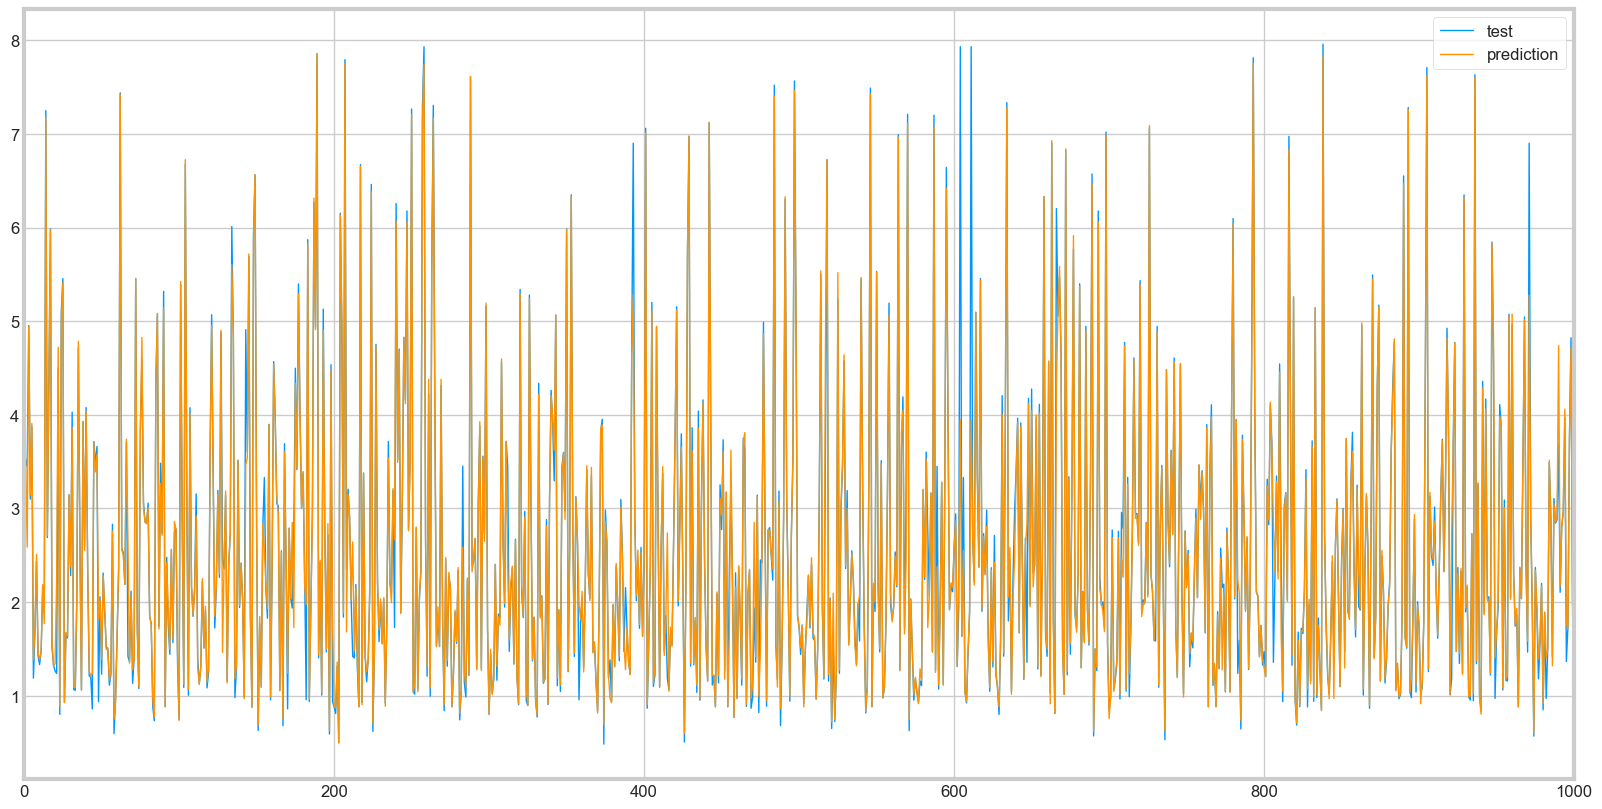

In [19]:
# plt.rcParams['font.sans-serif'] = [u'SimHei'] 
# plt.rcParams['axes.unicode_minus'] = False
 
# plt.plot(y_test,color="r",label="test") #颜色表示
 
# plt.plot(y_pred,color=(0,0,0),label="pred") 
 
 
# plt.axis([0,20,0,10])#设定x轴 y轴的范围
 
# plt.title("实际值与预测值折线图") 
 
# plt.legend()#增加图例
 
# plt.show() #显示图片


import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(20, 10))
# plt.plot(y_test, linewidth = 0.5)
# plt.plot(y_pred, linewidth = 0.5) 
plt.plot(y_test.ravel(), linewidth = 1)
plt.plot(y_pred.ravel(), linewidth = 1)
plt.xlim(0, 1000)
plt.legend(['test', 'prediction'])


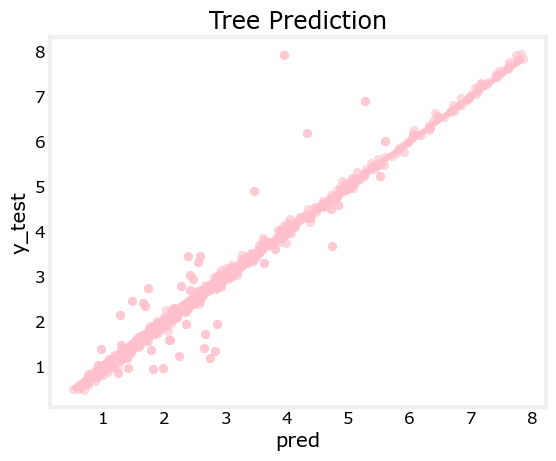

In [7]:
# 散点图
plt.scatter(y_pred, y_test, alpha=0.6,color='pink')
w = np.linspace(min(y_pred), max(y_pred), 100)
plt.plot(w, w,color='pink')
plt.xlabel('pred')
plt.ylabel('y_test')
plt.title('Tree Prediction')
plt.savefig("squares8.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            facecolor ="w",
            edgecolor ='w',
            dpi=300,
            orientation ='landscape') 

In [8]:
# 用其他测试集评估模型
# Prepare Data
# X = df.drop(columns = ['DSL'])
# y = df['DSL']
train_X, test_X, train_y, test_y = model_selection.train_test_split(X, y, test_size = 0.1, random_state=2023)
# # 转化为数组
# train_X = np.array(train_X)
# train_y = np.array(train_y)

pred_y = model.predict(test_X)
metrics_sklearn(test_y, pred_y)

EVS:  0.9977186622120616
R2:  0.9977183542214472
MSE:  0.0056587315437881675
MAPE:  0.8094645885958082


In [9]:
# 保存模型
import pickle
# save model to file 模型保存
pickle.dump(model, open("xgb.pickle.dat", "wb"))
 
# # load model from file 模型加载
loaded_model = pickle.load(open("xgb.pickle.dat", "rb"))


In [10]:
prd = loaded_model.predict(test_X)
metrics_sklearn(test_y, prd)

EVS:  0.9977186622120616
R2:  0.9977183542214472
MSE:  0.0056587315437881675
MAPE:  0.8094645885958082
